# **N06. Trajectory analysis in objects**

Track coordinates of the detected objects and characterize their movement.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import math
import os
from astropy.io import fits
from matplotlib.colors import LogNorm

import libraries.starfunctions as sf
import libraries.utilities as ut
import libraries.starcatalogs as sc
# Plotting configuration.
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["mathtext.fontset"] = "cm"  

## 0. Visualize comet.

In [2]:
metis_l2_info = "resources/mission_global_l2.csv"
l2_files = pd.read_csv(metis_l2_info)

/tmp/ipykernel_10069/3936328826.py:2: DtypeWarning: Columns (14,81) have mixed types. Specify dtype option on import or set low_memory=False.
  l2_files = pd.read_csv(metis_l2_info)


In [3]:
mask = l2_files.apply(lambda row: row.astype(str).str.contains("comet", case=False, na=False)).any(axis=1)
df_comet = l2_files[mask]

In [4]:
def create_link(df, index):
    row = df.iloc[index]

    return os.path.join("https://metisarchive.oato.inaf.it","archive/data", row["FILEPATH"], row["FILENAME"])

In [5]:
comet_indexes = df_comet["OBS_MODE"].index

In [6]:
link = create_link(l2_files, 154110)
ut.download_fits(link, "test1.fits", "resources")
image = fits.open("resources/test1.fits")[0]

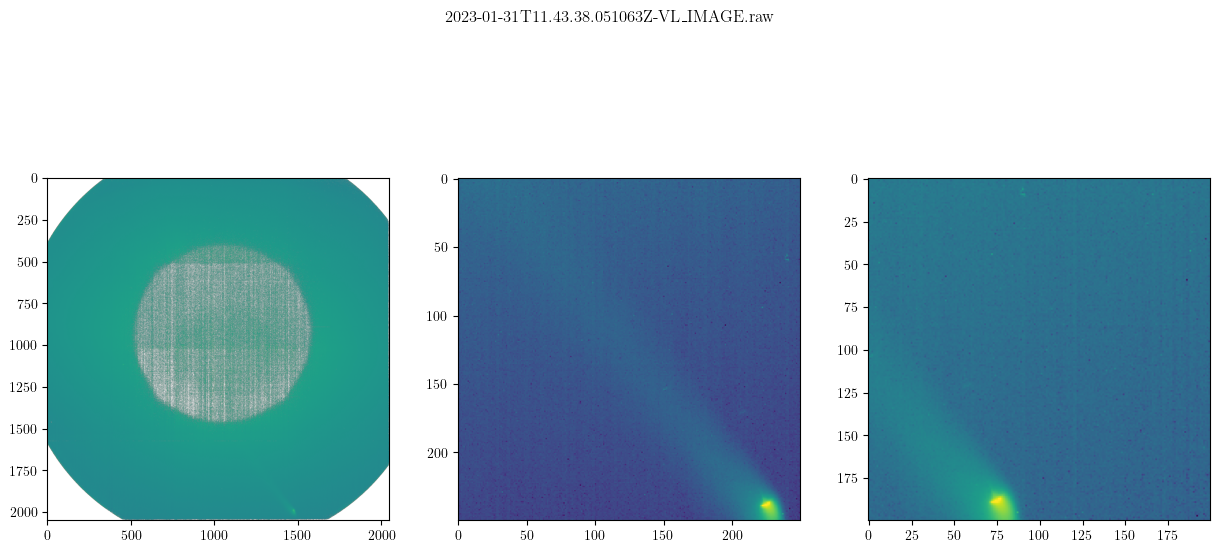

In [7]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])
axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[1750:2000,1250:1500], norm = LogNorm())
axis[2].imshow(image.data[1800:2000,1400:1600], norm = LogNorm())


In [8]:
link = create_link(l2_files, 73)
ut.download_fits(link, "test2.fits", "resources")
image = fits.open("resources/test2.fits")[0]

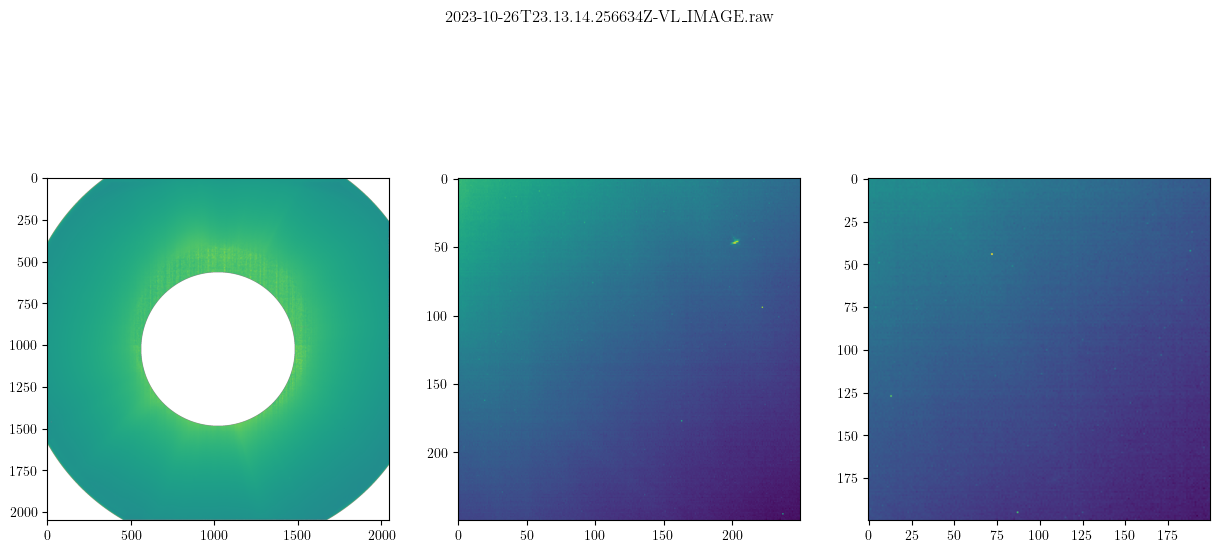

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])
axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[1750:2000,1250:1500], norm = LogNorm())
axis[2].imshow(image.data[1800:2000,1400:1600], norm = LogNorm())

Set 1

In [10]:
link = create_link(l2_files, 154478)
ut.download_fits(link, "test3.fits", "resources")
image = fits.open("resources/test3.fits")[0]


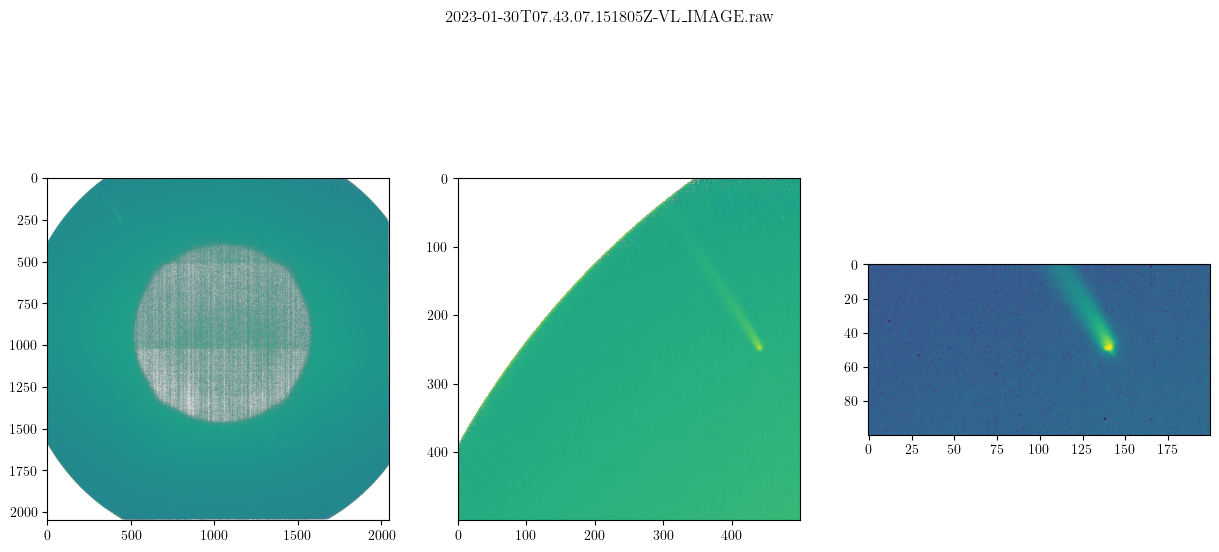

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])

axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[0:500,0:500], norm = LogNorm())
axis[2].imshow(image.data[200:300,300:500], norm = LogNorm())

In [12]:
link = create_link(l2_files, 154459)
ut.download_fits(link, "test3.fits", "resources")
image = fits.open("resources/test3.fits")[0]

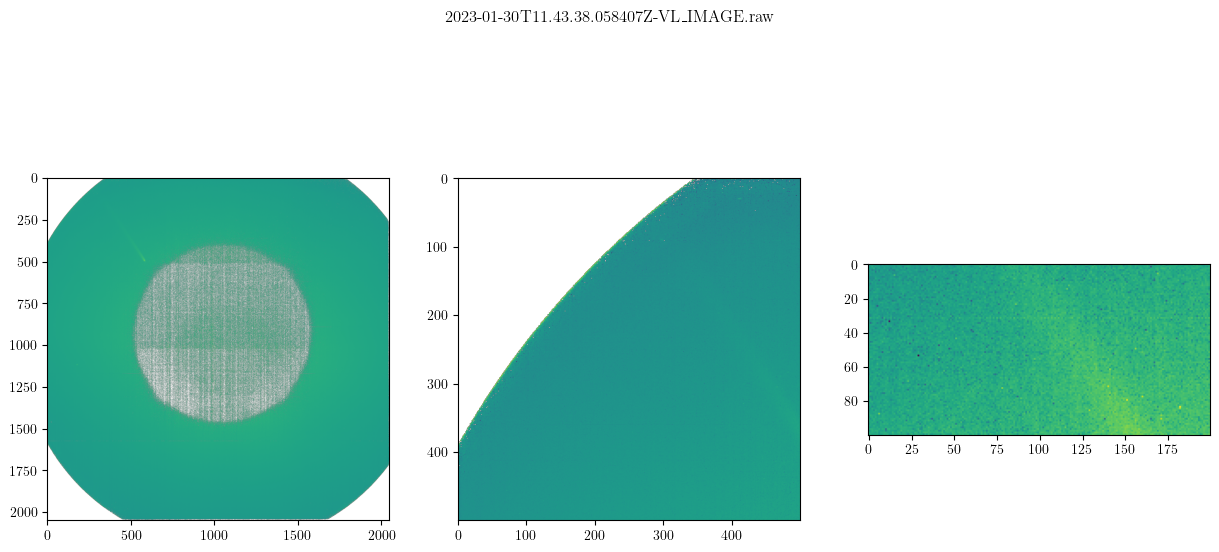

In [14]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])

axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[0:500,0:500], norm = LogNorm())
axis[2].imshow(image.data[200:300,300:500], norm = LogNorm())

In [15]:
link = create_link(l2_files, 154446)
ut.download_fits(link, "test5.fits", "resources")
image = fits.open("resources/test5.fits")[0]

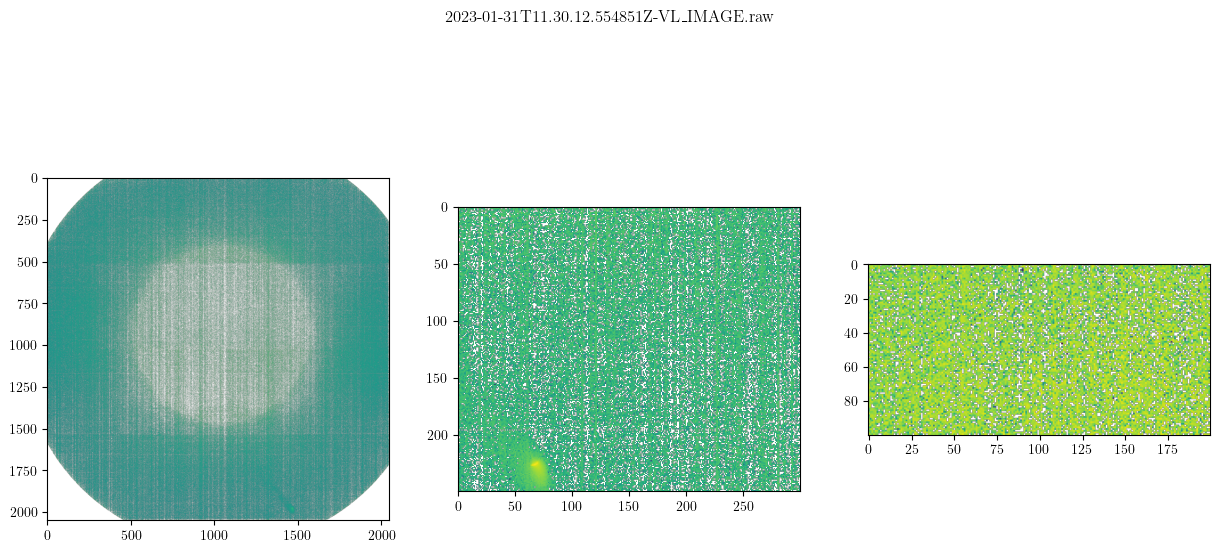

In [16]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])
axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[1750:2000,1400:1700], norm = LogNorm())
axis[2].imshow(image.data[200:300,300:500], norm = LogNorm())

In [17]:
link = create_link(l2_files, 154287)
ut.download_fits(link, "test6.fits", "resources")
image = fits.open("resources/test6.fits")[0]

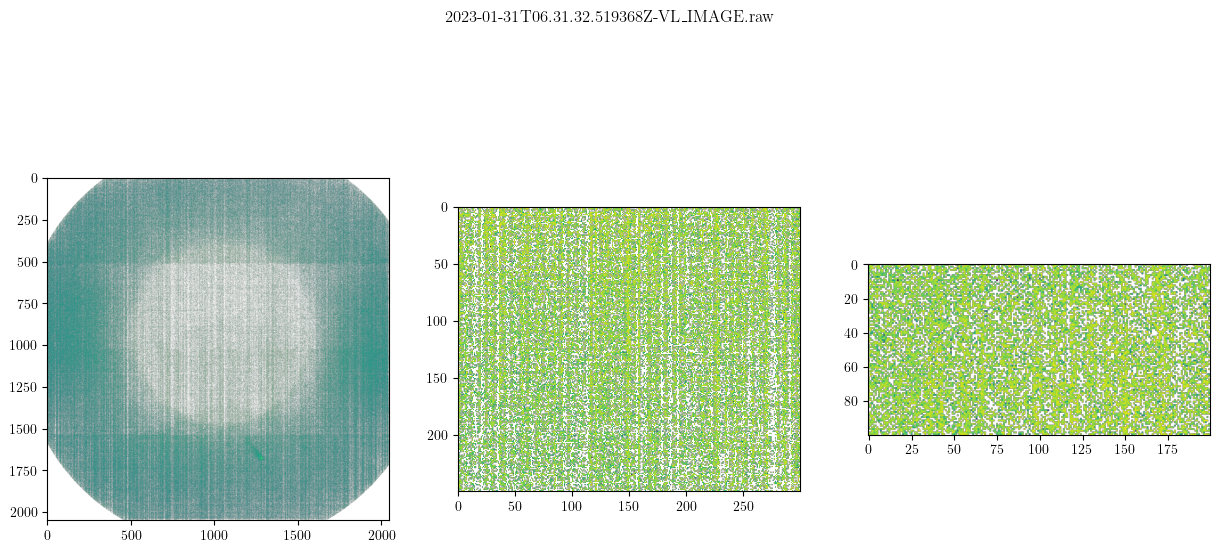

In [18]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle(image.header["FILE_RAW"])
axis[0].imshow(image.data, norm = LogNorm() )
axis[1].imshow(image.data[1750:2000,1400:1700], norm = LogNorm())
axis[2].imshow(image.data[200:300,300:500], norm = LogNorm())

## 1. Define window for analysis

Load the headers and objects.

In [2]:
detected_objects = pd.read_pickle("resources/objects/objects_files.pkl")
headers = pd.read_pickle("resources/objects/fits_files.pkl")
# Load headers.
image_headers = pd.DataFrame(pd.read_pickle("resources/metis_all25022025151324.pkl"))

Search for the STP with the largest number of files.

In [3]:
# Retrieve most populated STP.
stp_number= headers.groupby("STP").count().sort_values("LTP", ascending = True).iloc[-1].name
stp_vals = headers[headers["STP"] == stp_number]

# Extract datetime information.
stp_vals["TIMESTAMP"] = pd.to_datetime(stp_vals["TIMESTAMP"])
exists = np.ones(len(stp_vals))

/tmp/ipykernel_24075/2214481206.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stp_vals["TIMESTAMP"] = pd.to_datetime(stp_vals["TIMESTAMP"])
/tmp/ipykernel_24075/2214481206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stp_vals["TIMESTAMP"] = pd.to_datetime(stp_vals["TIMESTAMP"])


Display time distribution.

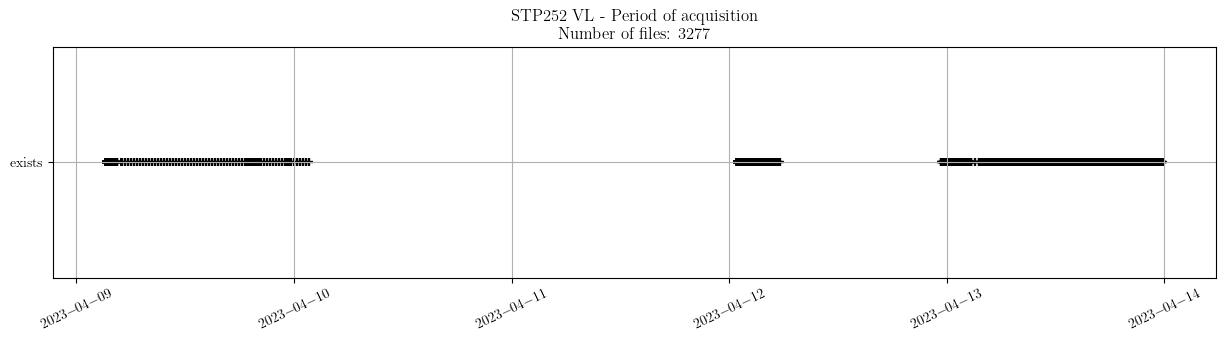

In [4]:
# Display timestamp distribution on chosen STP.
fig, axis = plt.subplots(1, 1,  figsize = (15, 3))
axis.scatter(stp_vals["TIMESTAMP"], exists, color = "k", marker = "+")
axis.set_title(f"{stp_number} VL - Period of acquisition \n Number of files: {len(stp_vals)}")
axis.grid(True)
axis.set_yticks([1])
axis.set_yticklabels(["exists"])
a =plt.xticks(rotation=25)

Select a shorter window.

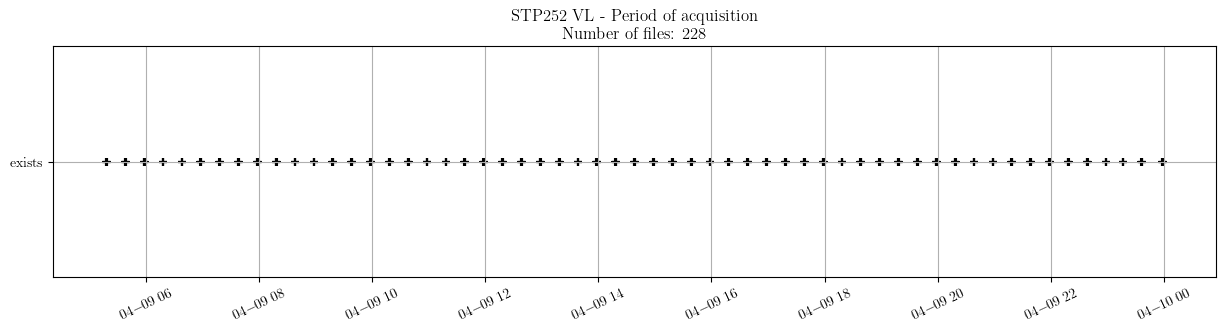

In [5]:
# Create new window to analyze.
start_time = pd.Timestamp("2023-04-09 05:00:00")
end_time = pd.Timestamp("2023-04-10 00:00:00")
stp_cut= stp_vals[(stp_vals["TIMESTAMP"] < end_time) & (stp_vals["TIMESTAMP"] > start_time)]

# Display timestamp distribution on chosen STP.
fig, axis = plt.subplots(1, 1,  figsize = (15, 3))
axis.scatter(stp_cut["TIMESTAMP"], np.ones(len(stp_cut)), color = "k", marker = "+")
axis.set_title(f"{stp_number} VL - Period of acquisition \n Number of files: {len(stp_cut)}")
axis.grid(True)
axis.set_yticks([1])
axis.set_yticklabels(["exists"])
a =plt.xticks(rotation=25)

Data in this period was acquired every 15 minutes.

### 1. Star analysis.

First, analyze the presence of stars in the selected time window, then extract the trajectory.

In [6]:
# Define dataset directory.
DATASET_DIR = "/home/stefano98/University of Padua/thesis/dataset/object_tracking"
STAR_DIR = os.path.join(DATASET_DIR, "stars")

In [7]:
def timestamp_average(obt_beg, obt_end):
    """
    Extract average timestamp from an observation period.

    Parameters:
        obt_beg (float): timestamp at the observation started in ef.
        obt_end (float): timestamp at the observation ended in ef.
    
    Output:
        obt_avg (float): average timestamp.
    """
    obt_avg = (obt_beg + obt_end) / 2

    frac, whole = math.modf(obt_avg)
    frac *= 65536.

    time = str(int(whole))+':'+str(int(frac))

    return time

# Compute timestamp to simulate stars.
init_obs = stp_cut["OBT_BEG"].iloc[0]
end_obs = stp_cut["OBT_END"].iloc[0]
avg_obs = timestamp_average(init_obs, end_obs)

Simulate stars in first FITS.

In [29]:
# Simulate possible stars in the first FITS file.
filename = stp_cut["FILENAME"].iloc[0]
url_found = image_headers[image_headers["url"].str.contains(filename)]["url"].iloc[0]
ut.download_fits(url_found, filename, STAR_DIR)

In [9]:
# Input parameters.
KERNEL_PATH = "/home/stefano98/University of Padua/thesis/Packages/Solar-orbiter/kernels/mk/"
KERNEL_NAME = "solo_ANC_soc-flown-mk.tm"
TIMESTAMP = avg_obs
MAX_MAG = 7
UV = False

## Load catalogue manually.
path_to_cat =  os.path.join("resources/catalogs", "Simbad_mag4-9.csv")
CAT = sc.StarCatalog('Simbad', path_to_cat)

# Retrieve stars.
sf.load_kernel(KERNEL_NAME, KERNEL_PATH)
stars,_, scale, center = sf.star_detector_offline(KERNEL_NAME, KERNEL_PATH, TIMESTAMP, UV, CAT, MAX_MAG)
sf.unload_kernel(KERNEL_NAME, KERNEL_PATH)

print(f"Number of detected stars: {len(stars)}")

Number of detected stars: 9


Display stars

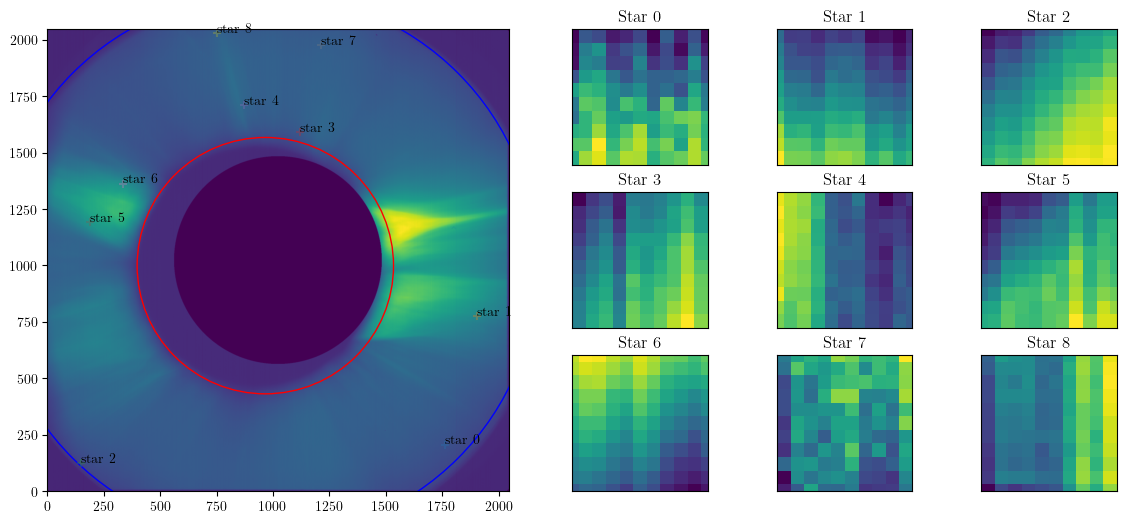

In [41]:
import matplotlib.gridspec as gridspec

image = fits.open(os.path.join(STAR_DIR, filename))[0].data
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(3, 4, width_ratios=[3, 1, 1, 1])

ax_fits = fig.add_subplot(gs[:, 0])
ax_fits.set_xlim(0,2048)
ax_fits.set_ylim(0,2048)
ax_fits.add_artist(plt.Circle(center, sf.METIS_fov_min/scale,color = "r", fill=None,))
ax_fits.add_artist(plt.Circle(center, sf.METIS_fov/scale, color = "b", fill=None))
ax_fits.imshow(image)

count = 0
lim = 10
for i in range(0, 3):
    for j in range(1, 4):
        axis = fig.add_subplot(gs[i,j])
        x = int(stars["xsensor"].iloc[count])
        y = int(stars["ysensor"].iloc[count])
        img = image[y-lim: y+lim, x-lim: x+lim]
        axis.imshow(img)
        axis.set_xticks([])
        axis.set_yticks([])
        axis.set_title(f"Star {count}")
        ax_fits.scatter(x, y, marker = "+", alpha = 0.3)
        ax_fits.text(x, y, f"star {count}")
        count += 1


Display objects.

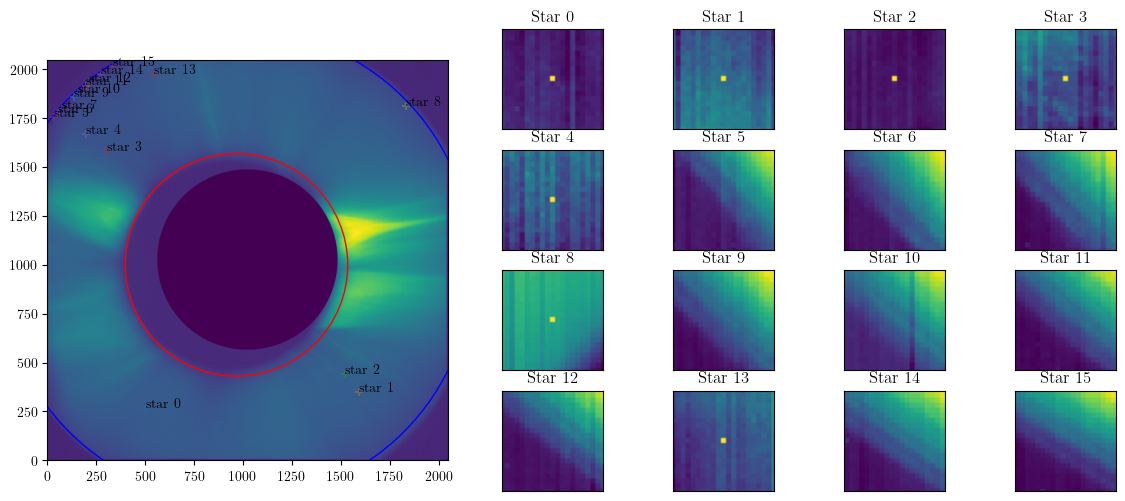

In [49]:
stp_objects = detected_objects[detected_objects["FILENAME"] == filename]

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(4, 5, width_ratios=[3, 1, 1, 1, 1])

ax_fits = fig.add_subplot(gs[:, 0])
ax_fits.set_xlim(0,2048)
ax_fits.set_ylim(0,2048)
ax_fits.add_artist(plt.Circle(center, sf.METIS_fov_min/scale,color = "r", fill=None,))
ax_fits.add_artist(plt.Circle(center, sf.METIS_fov/scale, color = "b", fill=None))
ax_fits.imshow(image)

count = 0
lim = 20
for i in range(0, 4):
    for j in range(1, 5):
        axis = fig.add_subplot(gs[i,j])
        x = int(stp_objects["X_COORD"].iloc[count])
        y = int(stp_objects["Y_COORD"].iloc[count])
        img = image[y-lim: y+lim, x-lim: x+lim]
        axis.imshow(img)
        axis.set_xticks([])
        axis.set_yticks([])
        axis.set_title(f"Star {count}")
        ax_fits.scatter(x, y, marker = "+", alpha = 0.3)
        ax_fits.text(x, y, f"star {count}")
        count += 1


In [44]:
stp_objects = detected_objects[detected_objects["FILENAME"] == filename]
len(stp_objects)

16

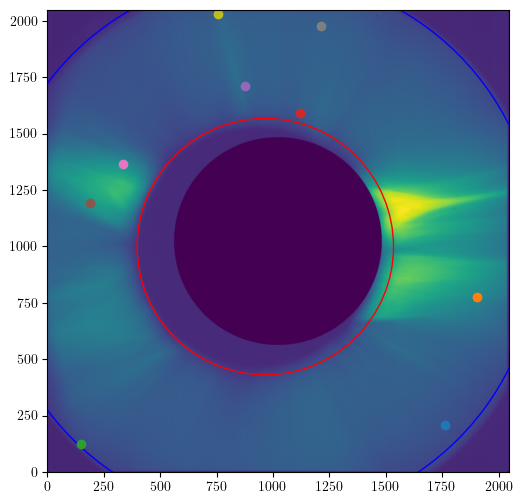

In [33]:
image = fits.open(os.path.join(STAR_DIR, filename))
fig, axis = plt.subplots(1, 1, figsize = (6, 6))
axis.set_xlim(0,2048)
axis.set_ylim(0,2048)
axis.add_artist(plt.Circle(center, sf.METIS_fov_min/scale,color = "r", fill=None, label = "outer fov" ))
axis.add_artist(plt.Circle(center, sf.METIS_fov/scale, color = "b", fill=None, label = "inner fov"))
for i in range(len(stars)):
    axis.scatter(stars["xsensor"].iloc[i],stars["ysensor"].iloc[i] )
    axis.imshow(image[0].data)

In [9]:
for i in range(len(stp_cut)):
    try:
        filename = stp_cut["FILENAME"].iloc[i]
        url_found = image_headers[image_headers["url"].str.contains(filename)]["url"].iloc[0]
        if not os.path.exists(os.path.join(DATASET_DIR, filename)):
            ut.download_fits(url_found, filename, DATASET_DIR)
    except Exception as e:
        print(e)


In [9]:
def storage_fits_data(folder):

    files = os.listdir(folder)
    fits_files_data = []
    for i in range(len(files)):
        fits_files_data.append(fits.open(os.path.join(folder, files[i]))[0].data)
    
    return fits_files_data

files = storage_fits_data(DATASET_DIR)

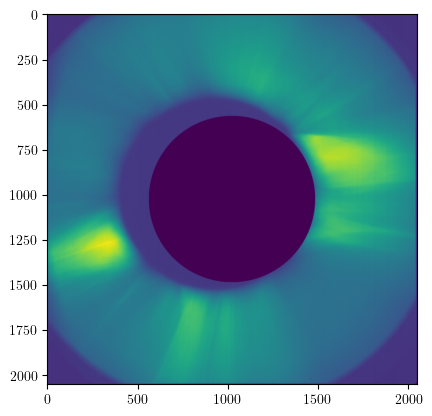

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

fig, ax = plt.subplots()
im = ax.imshow(files[0], animated=True)

def update(frame):
    im.set_array(files[frame])
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(files), blit=True)

# Set up FFMpegWriter
writer = FFMpegWriter(fps=5, metadata=dict(artist='Daddy Meza'), bitrate=5000)

# Save animation as MP4
ani.save("movie.mp4", writer=writer)

Check the presence of stars in the initial FITS file.

In [ ]:
# Input parameters.
KERNEL_PATH = "/home/stefano98/University of Padua/thesis/Packages/Solar-orbiter/kernels/mk/"
KERNEL_NAME = "solo_ANC_soc-flown-mk.tm"
TIMESTAMP = avg_obs
MAX_MAG = 6
UV = False

## Load catalogue manually.
path_to_cat =  os.path.join("resources/catalogs", "Simbad_mag4-9.csv")
CAT = sc.StarCatalog('Simbad', path_to_cat)

# Retrieve stars.
sf.load_kernel(KERNEL_NAME, KERNEL_PATH)
stars,_, scale, center = sf.star_detector_offline(KERNEL_NAME, KERNEL_PATH, TIMESTAMP, UV, CAT, MAX_MAG)
sf.unload_kernel(KERNEL_NAME, KERNEL_PATH)

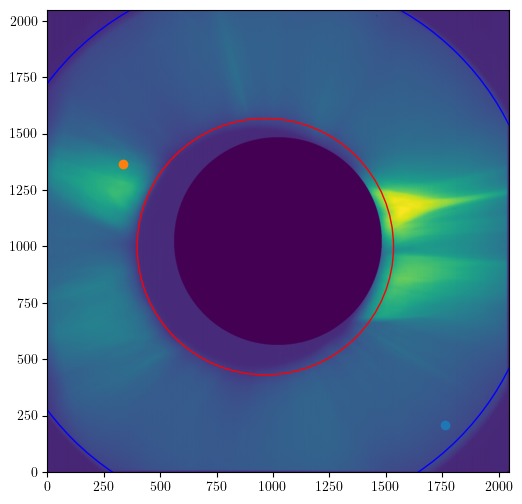

In [ ]:
image = fits.open(os.path.join(DATASET_DIR, filename))
fig, axis = plt.subplots(1, 1, figsize = (6, 6))
axis.set_xlim(0,2048)
axis.set_ylim(0,2048)
axis.add_artist(plt.Circle(center, sf.METIS_fov_min/scale,color = "r", fill=None, label = "outer fov" ))
axis.add_artist(plt.Circle(center, sf.METIS_fov/scale, color = "b", fill=None, label = "inner fov"))
for i in range(len(stars)):
    axis.scatter(stars["xsensor"].iloc[i],stars["ysensor"].iloc[i] )
    axis.imshow(image[0].data)


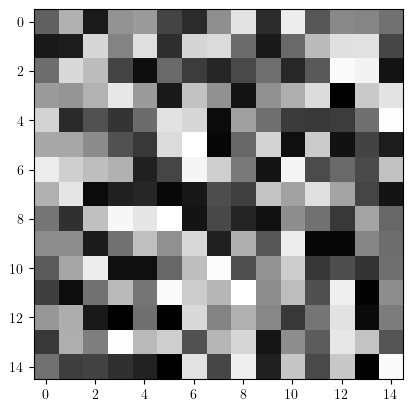

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dummy data: 100 frames of 2D 15x15 arrays
data = np.random.rand(100, 15, 15)

fig, ax = plt.subplots()
im = ax.imshow(data[0], cmap='gray', animated=True)

def update(frame):
    im.set_array(data[frame])
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(data), blit=True)


In [ ]:
ani.save("movie.mp4", writer='pillow', fps=10)

ValueError: unknown file extension: .mp4

In [ ]:
from matplotlib.animation import FFMpegWriter

In [ ]:
pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6127 sha256=52d37accc4d42f7b32e43dd32f761ad84ba6ace21bc7744cb50858be4e8159a7
  Stored in directory: /home/stefano98/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.
